# Predicting Heart Disease Using Machine Learning

This notebook is based on predicting heart disease with some foundation machine learning and data science concepts. This is the classification problem.

It is intended to be an end-to-end example of what a data science and machine learning proof of concept might look like.


## What is Classification? 

Categorizing the given data into the classes wheather the date is structured or unstructured. Classification with two outcomes is binary classification, Classification with more than two outcomes is Multi class Classification and the problem pattern belongs to more than one class is Multi label Classification. 

In this notebook we are dealing with the binary classification Problem.

## What we are gonna do throughout the notebook?

We have the dataset of heart disease UCI using this we are going to predict whether the patient have the heart disease or not. We will approach the problem step by step using this cycle.

<img src='https://miro.medium.com/max/6608/1*Gf0bWgr2wst9A1XR5gakLg.png'/>

Fig: 6 step machine learning modelling framework.

Mainly the topics that are involved in this notebook are:

* Explanatory Data Analysis: The process of going through the data set and finding more of it.
* Model Training: Creating the model using the train data set to predict the correct outcome using test data set.
* Model Evaluation: Evaluating a model using problem specific evaluation matrices.
* Model Comparision: Comparing the several different model to predict the best one.
* Model fine-tuning: Once we get the best model for our problem, how can we tune/improve it?
* Feature Importance: We are working to predict whether someone has heart disease or not? so we need to find that are there anything that are more important for prediction?
* Cross Validation: We know that cross validation is the one of best choice to predict from the unseen data because the model can be trained with the many folds during the training. It is way better choice than a random selection.
* Reporting what we've found: Presenting our work to others who are not familiar with these technical lines.

We will dive into them one by one. We are using following libraries:
### Data Analysis
* Numpy
* Pandas
* Matplotlib
* Seaborn

### Machine Learning and modelling
* Scikit-learn

So to understand this notebook well you need to better familiar with the above mentioned Python Libraries. At the end of the notebook we are going to successfully predict the heart disease patient using the given features in the data set. We we also know that which colum matter the most to predict the disease.


<img src = 'https://inteng-storage.s3.amazonaws.com/img/iea/Xy6xeK3Wwr/sizes/heart-attack-ai-oxford_resize_md.jpg'/>





## 1.Problem Definition

We know that we are prediction whether the patient have heart disease or not. This is based on the binary class classification because it is only based of 'True' or 'False'. We're going to be using a number of differnet features (pieces of information) about a person. Our main goal is:

`Given clinical parameters about a patient, can we predict whether or not they have heart disease?`


## 2.Data

The original database contains 76 attributes, but here only 14 attributes will be used. Attributes (also called features) are the variables what we'll use to predict our target variable. Attributes and features are also referred to as independent variables and a target variable can be referred to as a dependent variable.

**We use the independent variables to predict our dependent variable.**

Or in our case, the independent variables are a patients different medical attributes and the dependent variable is whether or not they have heart disease.

## 3.Evaluation

As machine learning is all about experimentation, we no need to worry about our first failure. Those who want to be successful in the very first attempt i think they don't have the long lasting career. So, we have to evaluate our project until we get the more nearly predicting output. Patence is the most important key in those moments.

'If we approach near to 95% accuracy we will be near to the future prediction. So, stay calm and tune your model to get the more better accuracy.'


## 4.Features

Features plays the most important role to predict something that we don't know. So a good features always plays a better role for prediction.

To understand the features in a better way let's create a data dictionary.

### Data Dictionary 

This data dictionary describes about the data that we are dealing with. We don't describes those data that i am not going to use during the modelling process.

The following are the features that we are going to use to predict target variable(heart disease or no heart disease):
1. age - age in years
2. sex - (1=male,0=female)
3. cp = chest pain
    * Typical angina: chest pain related decrease blood supply to the heart
    * Atypical angina: chest pain not related to heart
    * Non-anginal pain: typically esophageal spasms (non heart related)
    * Asymptomatic: chest pain not showing signs of disease
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital)
    * anything above 130-140 is typically cause for concern
5. chol - serum cholestoral in mg/dl
    * serum = LDL + HDL + .2 * triglycerides
    * above 200 is cause for concern
6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
    * '>126' mg/dL signals diabetes
7. restecg - resting electrocardiographic results
    * 0: Nothing to note
    * 1: ST-T Wave abnormality
        * can range from mild symptoms to severe problems
        * signals non-normal heart beat
    * 2: Possible or definite left ventricular hypertrophy
        * Enlarged heart's main pumping chamber
8. thalach - maximum heart rate achieved
9. exang - exercise induced angina (1 = yes; 0 = no)
10. oldpeak - ST depression induced by exercise relative to rest
    * looks at stress of heart during excercise
    * unhealthy heart will stress more
11. slope - the slope of the peak exercise ST segment
    * 0: Upsloping: better heart rate with excercise (uncommon)
    * 1: Flatsloping: minimal change (typical healthy heart)
    * 2: Downslopins: signs of unhealthy heart
12. ca - number of major vessels (0-3) colored by flourosopy
    * colored vessel means the doctor can see the blood passing through
    * the more blood movement the better (no clots)
13. thal - thalium stress result
    * 1,3: normal
    * 6: fixed defect: used to be defect but ok now
    * 7: reversable defect: no proper blood movement when excercising
14. target - have disease or not (1=yes, 0=no) (= the predicted attribute)


## Preparing Tools

Python doesnot provide all the support to solve these types of problems. So, before starting the project we have to import the necessarily library to do such type of tasks. I am going to import the necessary library in the beginning and i will import the other libraries when the problem arieses and python can not tackle it.

* [Pandas](https://pandas.pydata.org/) for data analysis
* [Numpy](https://numpy.org/) for numerical operations
* [Matplotlib](https://matplotlib.org/) / [Seaborn](https://seaborn.pydata.org/) for plotting and visualizations
* [Scikit-learn](https://scikit-learn.org/stable/) for machine learning

In [96]:
#Regular explanatory data analysis and plotting libraries.
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('fivethirtyeight')

#models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

#model evaluators
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report,precision_score,recall_score,f1_score,plot_roc_curve

## Load Data
There are many different formats of data and there are lots of tools to visualize those data. In these notebook we are dealing with the data with comma separated values(.csv) format data. Pandas have the inbuilt functions to load and visualize the data in a dataframe.

In [97]:
df = pd.read_csv('/kaggle/input/heart-disease-uci/heart.csv')
df.head() #first five rows

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Exploratory Data Analysis(Data Exploration or EDA)

one we imported our data and obtained in tabular form now we need to explore the data. The main thing we need to do is become more and more familiar with the data. Compare to the different columns, compare those columns (features) with the target variables(labels).

In [98]:
#lets count the total number of values in the target colums.
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

value_counts() allows you to show how many times each of the values of a categorical column appear.

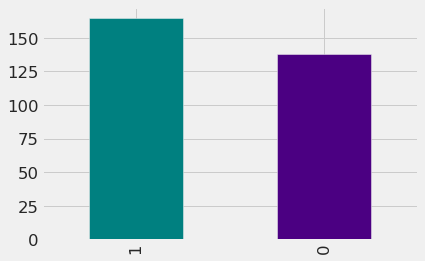

In [99]:
#Plot our target column
df['target'].value_counts().plot(kind='bar',color=["teal", "indigo"]);

In [100]:
#Finding if there is any missing values in the dataset.
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

df.info() shows a quick insight to the number of missing values we have and what type of data we are working with.

In our case, there are no missing values and all of our columns are numerical in nature.

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


Another way to get some quick insights from data is df.describe() function.

In [102]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


1 = Heart disease,  
0 = No heart disease

1 = Male,  
0 = Female

In [103]:
df['sex'].value_counts()

1    207
0     96
Name: sex, dtype: int64

We have 207 males and 96 females in our dataset.

In [104]:
# comparing target column with sex column.
pd.crosstab(df['target'],df['sex'])

sex,0,1
target,,
0,24,114
1,72,93


From the above table we can see that, there are about 100 women and 72 of them are positive value which is about 75% of the total women. on the other hand there are about 200 men out of them about 100 of them have the positice value which is about 50% of the total men.

Averaging these two values, we can assume, based on no other parameters, if there's a person, there's a 62.5% chance they have heart disease.

## Making Crosstab Visuals

Let's Compare the target and sex columns in a visual way.

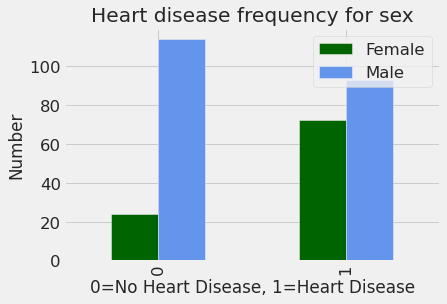

In [105]:
pd.crosstab(df['target'],df['sex']).plot(kind='bar',color=['darkgreen','cornflowerblue'])
plt.title('Heart disease frequency for sex')
plt.xlabel('0=No Heart Disease, 1=Heart Disease')
plt.ylabel('Number')
plt.legend(['Female','Male']);

## Age vs Max Heart Rate for Heart Disease

Let's first combine a couple of independent variable like age, thalach and compared with our target valiable.

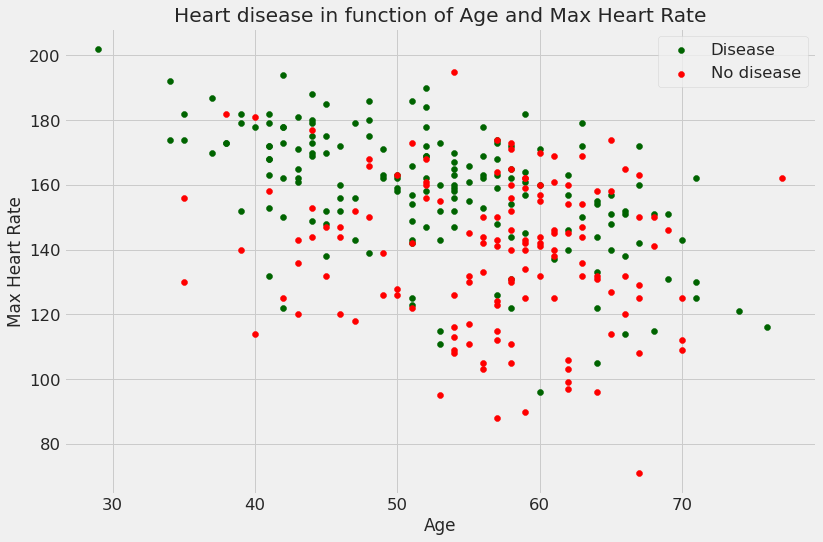

In [106]:
fig,ax = plt.subplots(nrows=1,
                     ncols=1,
                     figsize=(12,8))

#positive examples
ax.scatter(df['age'][df['target']==1],
          df['thalach'][df['target']==1],
          c = 'darkgreen')

#negative examples
ax.scatter(df['age'][df['target']==0],
          df['thalach'][df['target']==0],
          c = 'red')

ax.set(title='Heart disease in function of Age and Max Heart Rate',
      xlabel='Age',
      ylabel = 'Max Heart Rate')
ax.legend(['Disease','No disease']);

It seems the younger someone is, the higher their max heart rate (dots are higher on the left of the graph) and the older someone is, the more green dots there are. But this may be because there are more dots all together on the right side of the graph (older participants).

Both of these are observational of course, but this is what we're trying to do, build an understanding of the data.

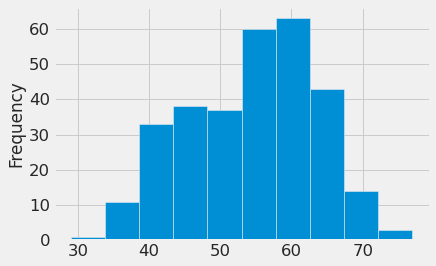

In [107]:
#age distribution
df['age'].plot(kind='hist')

It is a normal distribution also slightly a right skewed.

## Heart Disease frequency by chest pain type

Let's use the same process as used before.

In [108]:
pd.crosstab(df['cp'],df['target'])

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


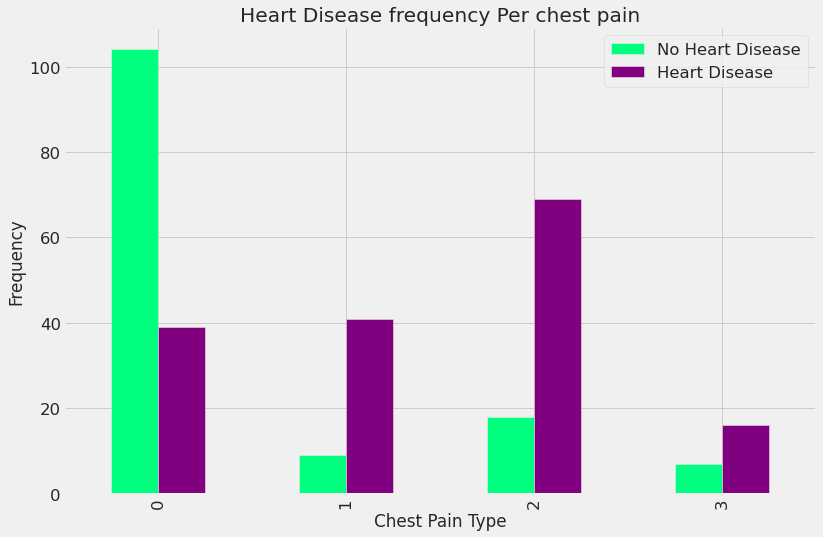

In [109]:
pd.crosstab(df['cp'],df['target']).plot(kind='bar',
                                       figsize=(12,8),
                                       color=['springgreen','purple'])
plt.title('Heart Disease frequency Per chest pain')
plt.xlabel('Chest Pain Type')
plt.ylabel('Frequency')
plt.legend(['No Heart Disease','Heart Disease']);

From our data dictionary:
1. cp - chest pain type
    * 0: Typical angina: chest pain related decrease blood supply to the heart
    * 1: Atypical angina: chest pain not related to heart
    * 2: Non-anginal pain: typically esophageal spasms (non heart related)
    * 3: Asymptomatic: chest pain not showing signs of disease
    
It's interesting the atypical agina (value 1) states it's not related to the heart but seems to have a higher ratio of participants with heart disease than not.


## Correlation between independent variables

Now compare all our independent variable because it gives the clear idea about which independent variable may or maynot have the impact on target variable. we can do this by using df.corr() function which gives the overalll result in a big table.

In [110]:
df_corr = df.corr()
df_corr

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


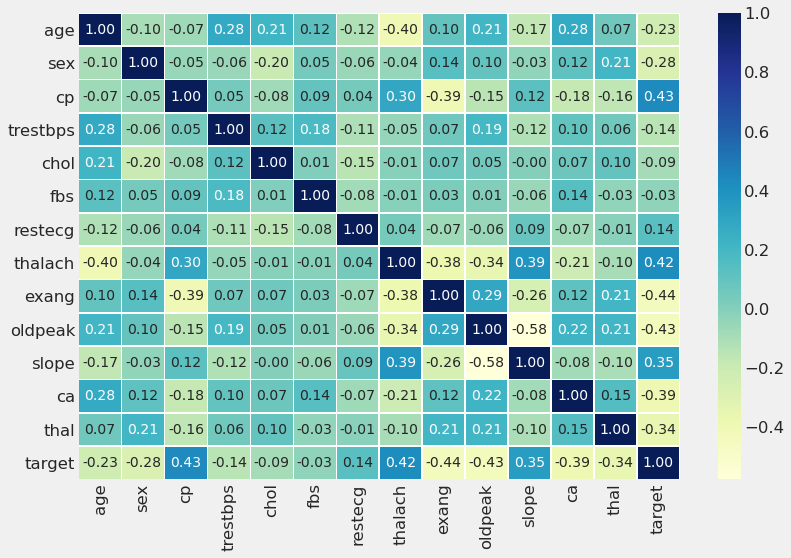

In [111]:
corr_matrix = df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix,
           annot=True,
           linewidths=0.5,
           fmt='.2f',
           cmap='YlGnBu');

Much better. A higher positive value means a potential positive correlation (increase) and a higher negative value means a potential negative correlation (decrease). This much of data analysis gives us a indepth knowledge about heart disease data.

Now it's time to model.


## 5.Modeling

We have get the idea from the data. Now its time to built a model using machine learning. We will use the catagorical features to predict the label. In our case we have 13 features and 1 label. so to do this we have to split the data into two parts. One is for features and other for labels.

In [112]:
# droping target variable
X = df.drop('target',axis=1)

# only target column
y = df['target']

X values.

In [113]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


Y values.

In [114]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

### Spliting our data into training and testing

we will use the scikit learn to split our data into train and test set. Before doing that we should remember not to train the model in a whole data.
if we use our all data to train a model then how do we know that our model is performing well in unseen data.
So before modelling remember that we should use our training set to train our model and test set to test our model.


In [115]:
#for reproducible code
np.random.seed(45)

#spliting our data into training and testing set.
X_train,X_test,y_train,y_test = train_test_split(X, #independent variable
                                                 y, #dependent variable
                                                 test_size=0.2) #percentage of data used for testing

We have used 80% of our data to train and 20% to test.

In [116]:
#lets look at the shape of our training and testing data
X_train.shape, X_test.shape, y_train.shape,y_test.shape

((242, 13), (61, 13), (242,), (61,))

Boom!! we are using 242 samples for training purpose and 61 samples for testing purpose.


### Choosing the right model.

I have my data prepared and everything is going fine upto now. 
Now its time to select the right model for the problem. I am gonna tackle this problem by using the following algorithms: 
1. Logistic Regression
2. K-Nearest Neighbors
3. Random Forest

### Why I am using these?

<img src='https://scikit-learn.org/stable/_static/ml_map.png'>

fig: Scikit-learn workflow



By looking at the above picture we can clearly see that we have less data in our database. So these could be the best choices at that condition.

Since our dataset is relatively small, we can experiment to find algorithm performs best.

All of the algorithms in the Scikit-Learn library use the same functions, for training a model, model.fit(X_train, y_train) and for scoring a model model.score(X_test, y_test). score() returns the ratio of correct predictions (1.0 = 100% correct).

In [119]:
# Using logistic regression
log = LogisticRegression(max_iter=1000).fit(X_train,y_train)
log_score = log.score(X_test,y_test)
print('The accuracy score of Logistic regression is: {:.2f}%'.format(log_score*100))

#Using KNeighbor
knn = KNeighborsClassifier().fit(X_train,y_train)
knn_score = knn.score(X_test,y_test)
print('The accuracy of K-Nearest Neighbors is: {:.2f}%'.format(knn_score*100))

#Using Random Forest 
clf = RandomForestClassifier().fit(X_train,y_train)
clf_score = clf.score(X_test,y_test)
print('The accuracy of Random Forest is: {:.2f}%'.format(clf_score*100))

The accuracy score of Logistic regression is: 83.61%
The accuracy of K-Nearest Neighbors is: 67.21%
The accuracy of Random Forest is: 85.25%


### Model Comparison

From the above randomized selected data we can see that Logistic regression and Random Forest have better accuracy compared to K-Nearnest Neighbors.

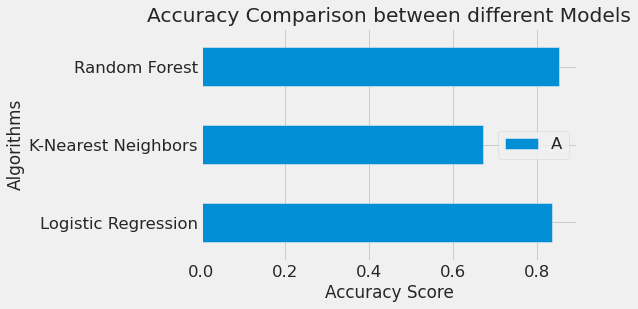

In [120]:
model_score={log_score,knn_score,clf_score}
model_comparison = pd.DataFrame(model_score,index=['Logistic Regression','K-Nearest Neighbors','Random Forest'])
model_comparison.plot(kind='barh')
plt.ylabel('Algorithms')
plt.xlabel('Accuracy Score')
plt.title('Accuracy Comparison between different Models')
plt.legend('Accuracy');

Let's go more in depth to the problem we are solving. 

* [Hyperparameter Tuning](https://www.oreilly.com/library/view/evaluating-machine-learning/9781492048756/ch04.html): A parameter whose value is set before the learning process begins.Changing these values may increase or decrease model performance.
* [Feature Importance](https://machinelearningmastery.com/calculate-feature-importance-with-python/#:~:text=Feature%20importance%20refers%20to%20a,feature%20when%20making%20a%20prediction.): if we are dealing with the large dataset we must give importance to those who plays a significant role in the problem.
* [Confusion Matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html): Compares the predicted values with the true values in a tabular way.
* [Cross Validation](https://scikit-learn.org/stable/modules/cross_validation.html):  Splits dataset into multiple parts and train and tests the model on each part and evaluates performance as an average. 
* [Precision](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html): Proportion of true positives over total number of samples.
* [Recall](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html): Proportion of true positives over total number of true positives and false negatives.
* [F1 score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html): Combines precision and recall into one metric
* [Classification Report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html): Returns some of the main classification metrics such as precision, recall and f1-score.
* [ROC curve](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html): Plot of true positive rate versus false positive rate.
* [AUC curve](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.auc.html): The area underneath the ROC curve.

## Hyperparameter tuning and cross validation

To test different hyperparameters, we could use a validation set but since we don't have much data, we'll use cross-validation.
The most common type of cross-validation is k-fold. It involves splitting  data into k-fold's and then testing a model on each. For example, let's say we had 5 folds (k = 5). This what it might look like.

<img src='https://scikit-learn.org/stable/_images/grid_search_cross_validation.png'/>



## Tuning models with with RandomizedSearchCV

we have seen that k-Nearest Neighbour have less accuracy as compared to Logistic regression and random forest. So let ignore that Knn for now and start with remaining two.

Let's create a hyperparameter dictionary  for each and test them out.


In [121]:
# Logistic Regression hyperperimeters
log_grid = {"C": np.logspace(-4, 4, 20),
            "solver": ["liblinear"]}

# Random Forest hyperperimeter
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

We have make our hyperparameter dictionary. Now its time to tune our logistic regression model.

### Tuning Logistic Regression

In [122]:
np.random.seed(20)

#setup random hyperparameter search.
log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_grid,
                                cv=5,
                                n_iter=20,#try 20 different combinations of hyperparameters
                                verbose=True)

#fitting the model
log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.8s finished


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [123]:
#checking the best parameters for logistic regression
log_reg.best_params_

{'solver': 'liblinear', 'C': 0.615848211066026}

In [124]:
print('The accuacy of Logistic regression using RandomizedSearchCV is: {:.2f}%'.format(log_reg.score(X_test,y_test)*100))

The accuacy of Logistic regression using RandomizedSearchCV is: 90.16%


Now its time to do the same with Random Forest.
### Tuning Random Forest

In [125]:
np.random.seed(20)

#setup random hyperparameter search.
rand = RandomizedSearchCV(RandomForestClassifier(),
                                param_distributions=rf_grid,
                                cv=5,
                                n_iter=20,#try 20 different combinations of hyperparameters
                                verbose=True)

#fitting the model
rand.fit(X_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  2.2min finished


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [126]:
#checking the best parameters for random forest
rand.best_params_

{'n_estimators': 910,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_depth': 3}

In [127]:
print('The accuracy of Random forest using RandomizedSearchCV is: {:.2f}%'.format(rand.score(X_test,y_test)*100))

The accuracy of Random forest using RandomizedSearchCV is: 90.16%


In the beginning when we use Logistic regression and Random forest  without cross validation, we got the accuracy score of 83.61% and 85.25% respectively. After tuning them we got the better result as 90.16% for both. This is the reason beside doing hyperparameter tuning.

## Tuning a model with GridSearchCV

The difference between RandomizedSearchCV and GridSearchCV is where RandomizedSearchCV searches over a grid of hyperparameters performing n_iter combinations, GridSearchCV will test every single possible combination.

* RandomizedSearchCV - tries n_iter combinations of hyperparameters and saves the best.
* GridSearchCV - tries every single combination of hyperparameters and saves the best.

In [128]:
log_search = GridSearchCV(LogisticRegression(),
                          param_grid=log_grid,
                          cv=5,
                          verbose=True)
#fitting the model
log_search.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.8s finished


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [129]:
#checking the best hyperperimeter.
log_search.best_params_

{'C': 0.615848211066026, 'solver': 'liblinear'}

In [130]:
print('The accuacy of Logistic regression using GridSearchCV is: {:.2f}%'.format(log_search.score(X_test,y_test)*100))

The accuacy of Logistic regression using GridSearchCV is: 90.16%



In this case, we get the same results as before since our grid only has a maximum of 20 different hyperparameter combinations.

Note: If there are a large amount of hyperparameters combinations in your grid, GridSearchCV may take a long time to try them all out. This is why it's a good idea to start with RandomizedSearchCV, try a certain amount of combinations and then use GridSearchCV to refine them.

## Evaluating a model beyond Accuracy.

Now we have the tuned model now lets try with matrix.

* ROC curve and AUC score - plot_roc_curve()
* Confusion matrix - confusion_matrix()
* Classification report - classification_report()
* Precision - precision_score()
* Recall - recall_score()
* F1-score - f1_score()

In [131]:
#making predictions on test data
y_preds = log_search.predict(X_test)
y_preds

array([1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0])

In [132]:
y_test.values

array([1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1])

### ROC Curve and AUC score

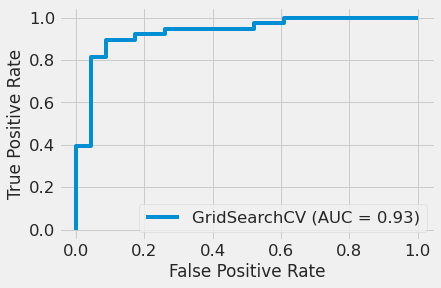

In [133]:
from sklearn.metrics import plot_roc_curve
#plotting the curve
plot_roc_curve(log_search,X_test,y_test);

As best model always scores 1. our model achieve the score of 0.93. Till now we have done the great job.

### Confusion matrix

The confusion matrix is to see where our model predicts the right decision and where it predicts the wrong.

In [134]:
#displaying confusion matrix.
print(confusion_matrix(y_test,y_preds))

[[21  2]
 [ 4 34]]


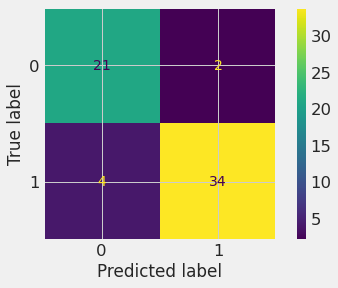

In [135]:
#plotting confusion matrix.
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(log_search,X_test,y_test);

### Classification report

A classification report give us information of the precision and recall of our model for each class.

In [136]:
# classification report
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87        23
           1       0.94      0.89      0.92        38

    accuracy                           0.90        61
   macro avg       0.89      0.90      0.90        61
weighted avg       0.91      0.90      0.90        61



* Precision - Indicates the proportion of positive identifications (model predicted class 1) which were actually correct. A model which produces no false positives has a precision of 1.0.
* Recall - Indicates the proportion of actual positives which were correctly classified. A model which produces no false negatives has a recall of 1.0.
* F1 score - A combination of precision and recall. A perfect model achieves an F1 score of 1.0.
* Support - The number of samples each metric was calculated on.
* Accuracy - The accuracy of the model in decimal form. Perfect accuracy is equal to 1.0.
* Macro avg - Short for macro average, the average precision, recall and F1 score between classes. Macro avg doesn’t class imbalance into effort, so if you do have class imbalances, pay attention to this metric.
* Weighted avg - Short for weighted average, the weighted average precision, recall and F1 score between classes. Weighted means each metric is calculated with respect to how many samples there are in each class. This metric will favour the majority class (e.g. will give a high value when one class out performs another due to having more samples).


Let's see the same thing in action using cross validation.


<img src='https://img.devrant.com/devrant/rant/r_1393414_v3ymZ.jpg'/>

In [137]:
# our best hyperparameter
log_search.best_params_

{'C': 0.615848211066026, 'solver': 'liblinear'}

In [138]:
from sklearn.model_selection import cross_val_score

#lets use the best model with best hyperpararmeters.
clf = LogisticRegression(C=0.615848211066026,
                        solver='liblinear')

Let's find some matrix using cross validation.

In [139]:
#cross validation accuracy score
cross_val_accuracy = cross_val_score(clf,X,y,cv=5,scoring='accuracy')
cross_val_accuracy

array([0.80327869, 0.85245902, 0.85245902, 0.85      , 0.75      ])

In [140]:
#Let's find the average of the above 5 values.
cross_val_accuracy = np.mean(cross_val_accuracy)
print('Cross validation accuracy score is: {:.2f}'.format(cross_val_accuracy))

Cross validation accuracy score is: 0.82


In [141]:
#cross validation precision score.
cross_val_precision = cross_val_score(clf,X,y,cv=5,scoring='precision')
cross_val_precision

array([0.76923077, 0.875     , 0.85294118, 0.83333333, 0.725     ])

In [142]:
#Let's find the average of the above 5 values.
cross_val_precision = np.mean(cross_val_precision)
print('Cross validation Precision score is: {:.2f}'.format(cross_val_precision))

Cross validation Precision score is: 0.81


In [143]:
#cross validation recall score.
cross_val_recall = cross_val_score(clf,X,y,cv=5,scoring='recall')
cross_val_recall

array([0.90909091, 0.84848485, 0.87878788, 0.90909091, 0.87878788])

In [144]:
#Let's find the average of the above 5 values.
cross_val_recall = np.mean(cross_val_recall)
print('Cross validation recall score is: {:.2f}'.format(cross_val_recall))

Cross validation recall score is: 0.88


In [145]:
#cross validation recall score.
cross_val_f1 = cross_val_score(clf,X,y,cv=5,scoring='f1')
cross_val_f1

array([0.83333333, 0.86153846, 0.86567164, 0.86956522, 0.79452055])

In [146]:
#Let's find the average of the above 5 values.
cross_val_f1 = np.mean(cross_val_f1)
print('Cross validation f1 score is: {:.2f}'.format(cross_val_f1))

Cross validation f1 score is: 0.84


We have got our cross validated metrics, Now visualize them to compare how they perform.

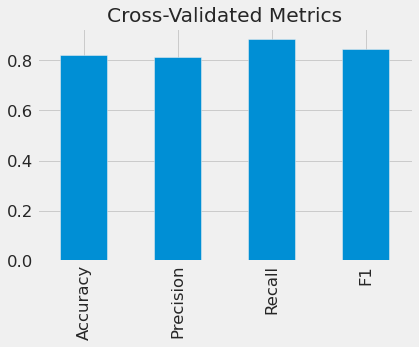

In [147]:
# Visualizing cross-validated metrics
cross_val_metrics = pd.DataFrame({"Accuracy": cross_val_accuracy,
                            "Precision": cross_val_precision,
                            "Recall": cross_val_recall,
                            "F1": cross_val_f1},
                          index=[0])
cross_val_metrics.T.plot.bar(title="Cross-Validated Metrics", legend=False);

## Feature Importance

"which features contributing most to the outcomes of the model?"


In [148]:
clf.fit(X_train,y_train)
features_dict = dict(zip(df.columns, list(clf.coef_[0])))
features_dict

{'age': 0.010040679452739053,
 'sex': -1.3958678564109142,
 'cp': 0.7262732156431895,
 'trestbps': -0.014203261748736833,
 'chol': -0.0033989252973968204,
 'fbs': 0.04538272015864104,
 'restecg': 0.4107970900860567,
 'thalach': 0.026639780753062316,
 'exang': -0.7979686497716582,
 'oldpeak': -0.5376947499646423,
 'slope': 0.622630007800473,
 'ca': -0.6454944074420566,
 'thal': -0.6752999705828504}

Looking at this it might not make much sense. But these values are how much each feature contributes to how a model makes a decision on whether patterns in a sample of patients health data leans more towards having heart disease or not.

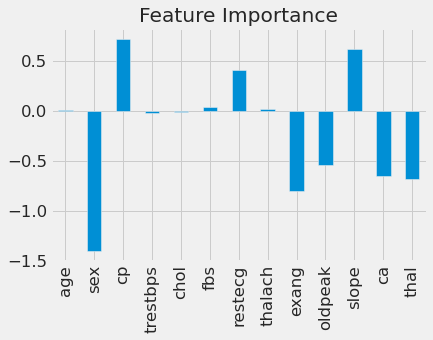

In [149]:
# Visualize feature importance
features_df = pd.DataFrame(features_dict, index=[0])
features_df.T.plot.bar(title="Feature Importance", legend=False);

Here we notice that some are negative and some are positive.

The larger the value (bigger bar), the more the feature contributes to the models decision.

If the value is negative, it means there's a negative correlation. And vice versa for positive values.

For example, the sex attribute has a negative value of -1.3, which means as the value for sex increases, the target value decreases.

We can see this by comparing the sex column to the target column.

In [150]:
pd.crosstab(df["sex"], df["target"])

target,0,1
sex,,
0,24,72
1,114,93


We can see, when sex is 0 (female), there are almost 3 times as many (72 vs. 24) people with heart disease (target = 1) than without.

And then as sex increases to 1 (male), the ratio goes down to almost 1 to 1 (114 vs. 93) of people who have heart disease and who don't.

What does this mean?

It means the model has found a pattern which reflects the data. Looking at these figures and this specific dataset, it seems if the patient is female, they're more likely to have heart disease.

How about a positive correlation?

In [151]:
# Contrast slope (positive coefficient) with target
pd.crosstab(df["slope"], df["target"])

target,0,1
slope,,
0,12,9
1,91,49
2,35,107


According to the model, there's a positive correlation of 0.70, not as strong as sex and target but still more than 0.

This positive correlation means our model is picking up the pattern that as slope increases, so does the target value.